# Исследование данных

In [1]:
# Загрузка нужных библиотек
import pandas as pd
import numpy as np

import warnings; warnings.simplefilter('ignore')

import kaleido

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import scipy.stats as stats
from scipy.stats.stats import pearsonr

In [2]:
# Загрузка данных
df = pd.read_csv('data/df.csv')

df.date = pd.to_datetime(df.date)
df.head()

,date,store_nbr,family,sales,onpromotion,city,state,store_type,cluster,month,year
0,2013-01-01,1,Автомобильные товары,0.0,0,Quito,Pichincha,D,13,1,2013
1,2013-01-01,1,Уход за детьми,0.0,0,Quito,Pichincha,D,13,1,2013
2,2013-01-01,1,Косметика,0.0,0,Quito,Pichincha,D,13,1,2013
3,2013-01-01,1,Напитки,0.0,0,Quito,Pichincha,D,13,1,2013
4,2013-01-01,1,Книги,0.0,0,Quito,Pichincha,D,13,1,2013


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
 5   city         object        
 6   state        object        
 7   store_type   object        
 8   cluster      int64         
 9   month        int64         
 10  year         int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 251.8+ MB


# 1. Какая доля продаж приходится на каждый тип продукта? У каких продуктов продажи больше и у каких меньше?

Сделаем группировку данных по типу продуктов и посчитаем суммарные продажи. Затем посмотрим, какой процент от общих продаж приходится на каждый тип продукта.

In [4]:
categories_count = df.groupby('family')['sales'].sum()
categories_count = categories_count / categories_count.sum()

5 типов продуктов с наибольшими объемами продаж.

In [5]:
categories_count.sort_values(ascending=False).head()

family
Товары первой необходимости (бакалея тип 1)    0.319903
Напитки                                        0.202073
Сельскохозяйственная продукция                 0.114288
Чистящие средства                              0.090832
Молочная продукция                             0.060064
Name: sales, dtype: float64

5 типов продуктов с наименьшими объемами продаж.

In [6]:
categories_count.sort_values(ascending=True).head()

family
Книги                      0.000006
Уход за детьми             0.000009
Бытовая техника            0.000039
Программное обеспечение    0.000096
Журналы                    0.000248
Name: sales, dtype: float64

In [7]:
import plotly

In [11]:
# Возьмем продукты с объемом продаж меньше 2.5% от общего объема и посчитаем их суммарный процент
threshold = 0.025
filtered_values = categories_count[categories_count < threshold]
sum_filtered = filtered_values.sum()

# Отберем продукты с объемом продаж больше 2.5% от общего объема
new_data = categories_count[categories_count >= threshold]

# Соберем все данные в датафрейм
new_data['Другое'] = sum_filtered
new_data = pd.DataFrame(new_data).reset_index()

# Нарисуем график
fig = go.Figure(data=[go.Pie(labels=new_data['family'], 
                             values=new_data['sales'], 
                             textinfo='label+percent',
                             insidetextorientation='radial',
                            )])

fig.update_layout(
    autosize=False,
    width=1200,
    height=900,
    title_text='Продажи продуктов в процентном соотношении'
)

fig.show()

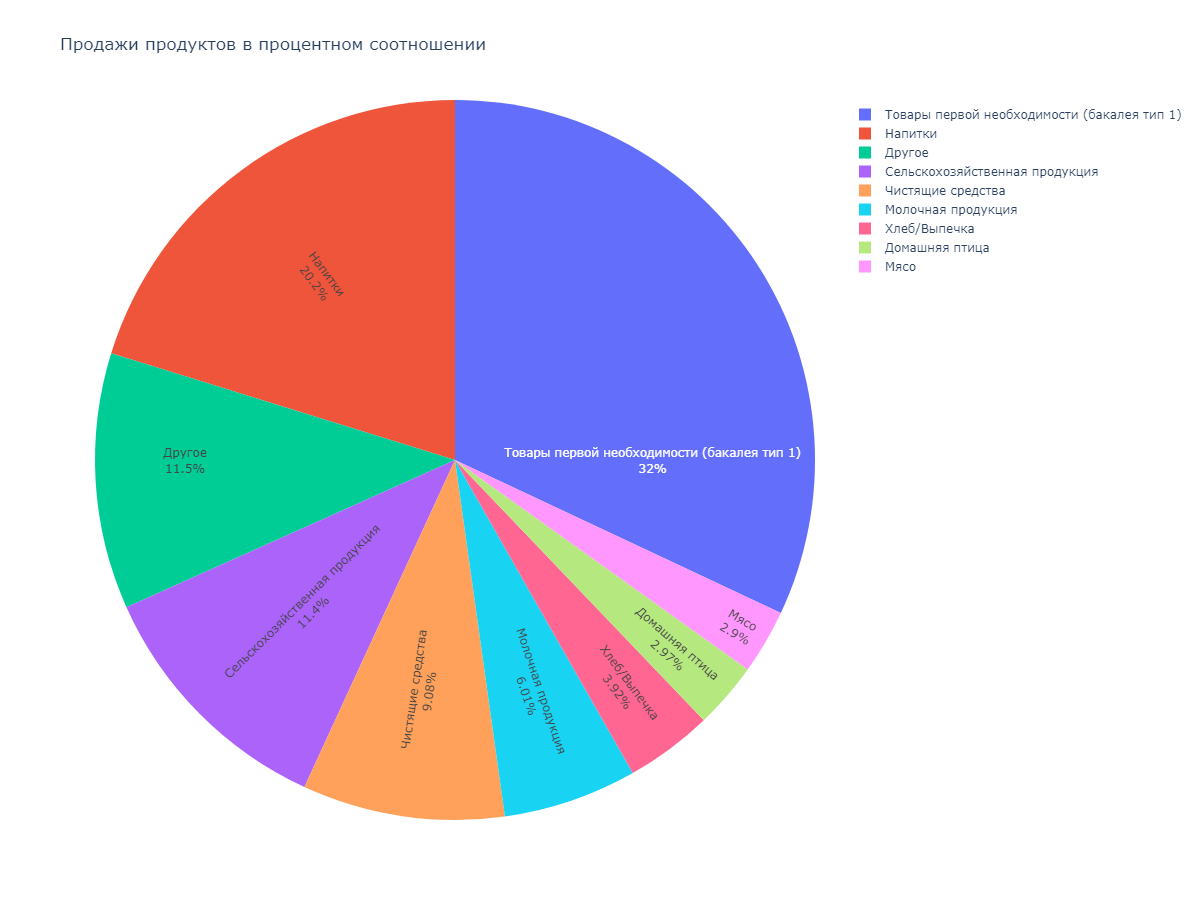

In [15]:
from IPython.display import Image, display

display(Image(filename='img/products_sales.png', width=1000))